# Case Study 1 DS7333

## Rashmi Patel        

### Business Understanding

The objective behind this case study is to build a linear regression modeling using L1 (LASSO) or L2 (Ridge) regularization to predict the cirtical temperature. The team was given two files which contain the data and from this data we must attempt to predict the cirtical temperature.

Our overall goals are to predict critical temperature and to describe which variable carries the most importance.

## Data Understanding

### Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge, RidgeCV, LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



In [2]:
# Data import
df1 = pd.read_csv('https://raw.githubusercontent.com/RashmiAPatel19/MSDS-7333-Quantifying-the-world/main/Casestudy1/train.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/RashmiAPatel19/MSDS-7333-Quantifying-the-world/main/Casestudy1/unique_m.csv')



In [3]:
df1 = df1.drop(['critical_temp'], axis=1)


In [4]:
# Merge the two data frames
df = pd.concat([df1, df2], axis=1)
df_target=df['critical_temp']

In [5]:
df.head()
df.tail()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44,Tm0.84Lu0.16Fe3Si5
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10,Tl1Ba2Ca3Cu4O11
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98,Nb0.8Pd0.2
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84,Nb0.69Pd0.31
21262,3,87.468333,86.858500,82.555758,80.458722,1.041270,0.895229,71.75500,43.144000,29.905282,...,0.0,0.0,0.0,0.0,0.0,0,0,0,12.80,Fe1Se0.2Te0.8


### Verify data quality

In [6]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0,185.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Columns: 169 entries, number_of_elements to material
dtypes: float64(156), int64(12), object(1)
memory usage: 27.4+ MB


In [8]:
df.shape

(21263, 169)

#### Reason why 'material' column needs to be dropped

* Too many unique string values
* Does not contribute to target variable

In [9]:
len(df['material'].unique())


15542

In [10]:
df = df.drop(['material'], axis = 1)

In [11]:
df.shape

(21263, 168)

#### Missing Values

There is no missing data in the dataset provided.

In [12]:
df.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
Bi                       0
Po                       0
At                       0
Rn                       0
critical_temp            0
Length: 168, dtype: int64

#### Looking at the duplicates values

We found that, the data contains no duplicat values.

In [13]:
print(len(df))
df.drop_duplicates(keep = False, inplace = True)
print(len(df))

21263
21263


#### Identifying Outliers 

Outliers could be extreme minimum and maximum that is produced from data entry error.
For identifying and removing the outliers, we have selected 25% and 75% interquartile range (IQR).


In [14]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [15]:
new_df=remove_outlier_IQR(df)
new_df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21249.000000,19657.000000,20024.000000,17949.000000,20016.000000,20876.000000,21263.000000,21263.000000,19634.000000,21259.000000,...,20844.0,21021.0,20418.0,20355.0,20008.0,18874.0,21263.0,21263.0,21263.0,21262.000000
mean,4.112005,85.114701,67.080157,65.017534,51.997273,1.186367,1.063884,115.601251,27.231297,44.381371,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.414137
std,1.434295,21.491900,23.731332,15.302059,25.713811,0.334414,0.401423,54.626887,15.093604,20.022619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.239597
min,1.000000,30.773670,6.423452,28.006329,1.960849,0.252926,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000210
25%,3.000000,72.894330,51.790200,58.637102,35.083280,0.994773,0.775363,78.512902,15.778377,32.890369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.362500
50%,4.000000,84.188275,59.233256,64.950920,37.745689,1.199897,1.146783,122.906070,25.192187,45.123500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.000000
75%,5.000000,97.232400,81.043039,73.088376,68.202584,1.444537,1.359418,154.119320,36.423869,59.316524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.000000
max,8.000000,142.199717,137.015000,108.192809,129.870304,1.983797,1.958203,207.972460,70.616350,96.824500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143.000000


#### Looking at distribution of target attribute-Critical Temprature

Looking at the plot below we can say that the critical temperature is skewed heaving on the right side. So, to normalize this right skewed distribution, we will apply log transform on the target variable.

(array([1.0337e+04, 3.3630e+03, 1.6860e+03, 1.6280e+03, 2.9360e+03,
        9.1500e+02, 2.9900e+02, 9.8000e+01, 0.0000e+00, 1.0000e+00]),
 array([2.10000000e-04, 1.85001890e+01, 3.70001680e+01, 5.55001470e+01,
        7.40001260e+01, 9.25001050e+01, 1.11000084e+02, 1.29500063e+02,
        1.48000042e+02, 1.66500021e+02, 1.85000000e+02]),
 <BarContainer object of 10 artists>)

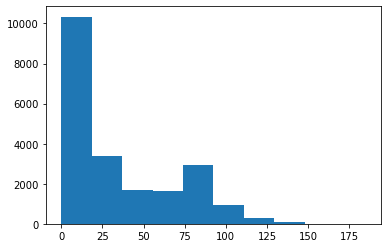

In [16]:
plt.hist(df['critical_temp'])

(array([5.000e+00, 7.000e+00, 8.000e+00, 8.300e+01, 2.010e+02, 5.280e+02,
        2.452e+03, 5.178e+03, 6.259e+03, 6.542e+03]),
 array([-8.46840303, -7.09952714, -5.73065126, -4.36177537, -2.99289949,
        -1.6240236 , -0.25514772,  1.11372817,  2.48260405,  3.85147994,
         5.22035583]),
 <BarContainer object of 10 artists>)

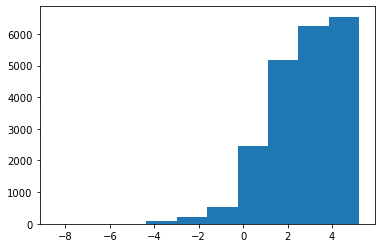

In [17]:
plt.hist(np.log(df['critical_temp']))

Even after the transformation, the data is still skewed but this time towrads left. 
So considering that the dataset is large enough, we can violate the assumption of normality.

#### Looking at the correlation between the temperature versus each attribute present in the data

/Users/arth/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/arth/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


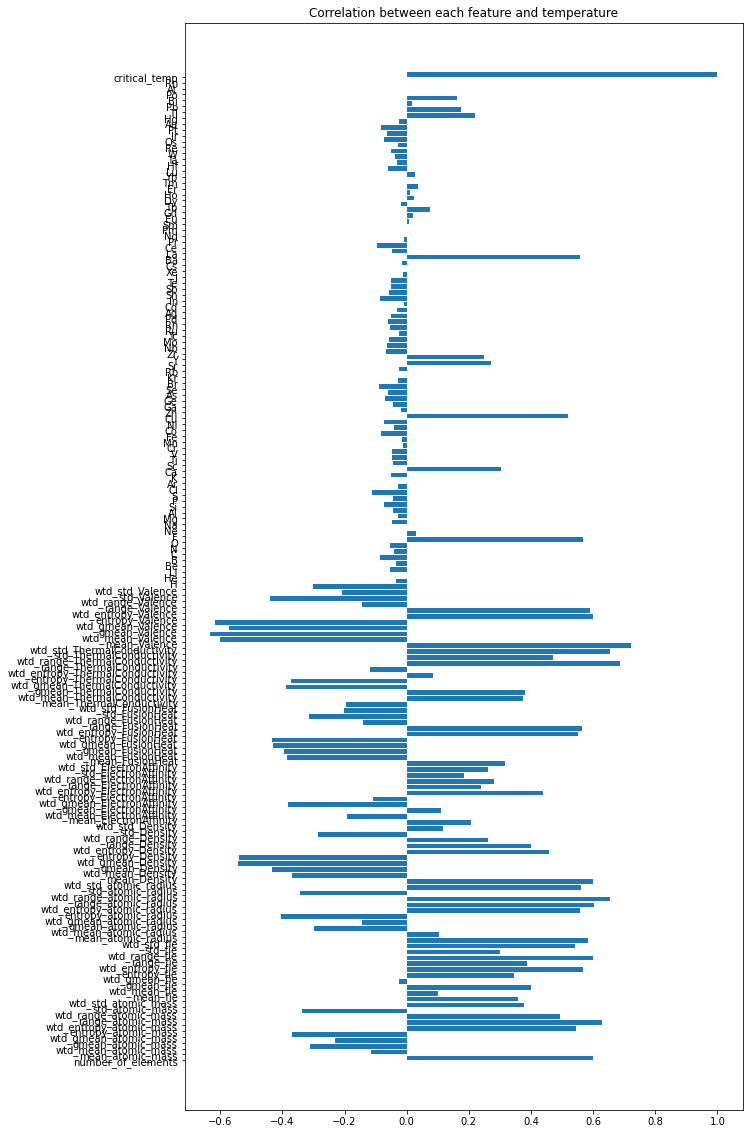

In [18]:
correlation = {}
for x in df.columns:
    correlation[x] = np.corrcoef(df[x],df_target)[0,1]
correlations = pd.DataFrame.from_dict(correlation,orient='index').reset_index()
correlations.rename(columns={'index':'Name',0:'Correlation coefficient'},inplace=True)
plt.figure(figsize=(10,20))
plt.barh(correlations['Name'],correlations['Correlation coefficient'],align='edge')
plt.title('Correlation between each feature and temperature')
plt.show()

#### Train and test split dataset

In [19]:
# Separating the dependent and independent variables
y = df['critical_temp']
X = df.drop(labels=['critical_temp'], axis = 1)

features = list(X.columns)



In [20]:
# Dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
X_train.shape, X_test.shape

((15947, 167), (5316, 167))

In [21]:
feature_num = len(X)
feature_num

21263

#### Normalization

In [22]:
# Train_X data
from sklearn import preprocessing
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

### Building the model

#### Regular Linear Regression Model

In [24]:
# Fit a linear regression to the training data
reg = LinearRegression(normalize=True).fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.coef_)
print(reg.intercept_)
print(reg.get_params())


0.7683816092272885
[ 7.70288831e-01  8.67373343e-01 -1.36735794e+00 -4.29140856e-01
  8.63761026e-01 -3.02940213e+01  2.15347179e+00  1.59748903e-01
  1.16594287e-01 -4.45808921e-01  6.24269247e-02 -2.29476241e-01
  5.78889874e-02  2.06349104e-01 -1.75156087e-02 -1.70660882e+01
  5.33296285e+01  4.60565032e-02  2.05842406e-02 -6.45141039e-02
 -7.36768174e-02 -7.77139053e-01  2.58768422e+00  5.53794659e-01
 -2.34152440e+00 -1.33985319e+01  1.87133207e+01  6.95744735e-02
 -7.18466697e-02 -2.20875553e-01 -1.04529738e-01 -5.51945479e-03
  5.28681331e-03  8.91298727e-04 -9.56095968e-04 -8.86510884e-01
 -2.08371953e+00 -9.11148109e-04 -6.18719647e-04  3.55693207e-03
 -1.49123640e-03 -5.33209478e-02  3.13496555e-01  1.35096327e-01
 -4.03995250e-01  8.66660300e+00 -1.75223900e+01 -3.41652959e-01
 -5.78284910e-02  1.15585108e+00 -4.72661799e-01  1.01925769e+00
 -1.58772077e+00 -7.12765086e-01  1.14455656e+00 -1.70073697e+01
  2.10986518e+01 -7.47371697e-02  5.95978466e-01 -8.46012687e-01
  4.96

In [37]:
y_pred = reg_.predict(X_train)
print(mean_absolute_error(y_train,y_pred))


12.262294754215413


#### L1-LASSO Model

In [25]:
def weight_versus_alpha_plot(weight, alphas, features):
    """
    Pass in the estimated weight, the alpha value and the names
    for the features and plot the model's estimated coefficient weight 
    for different alpha values
    """
    fig = plt.figure(figsize = (8, 6))
    
    # ensure that the weight is an array
    weight = np.array(weight)
    for col in range(weight.shape[1]):
        plt.plot(alphas, weight[:, col], label = features[col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
    
    # manually specify the coordinate of the legend
    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coefficient Weight as Alpha Grows')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig

different alpha values: [0.01, 0.1, 1, 5, 8]


/Users/arth/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 748892.8917692176, tolerance: 1873.5730960173764
  model = cd_fast.enet_coordinate_descent(


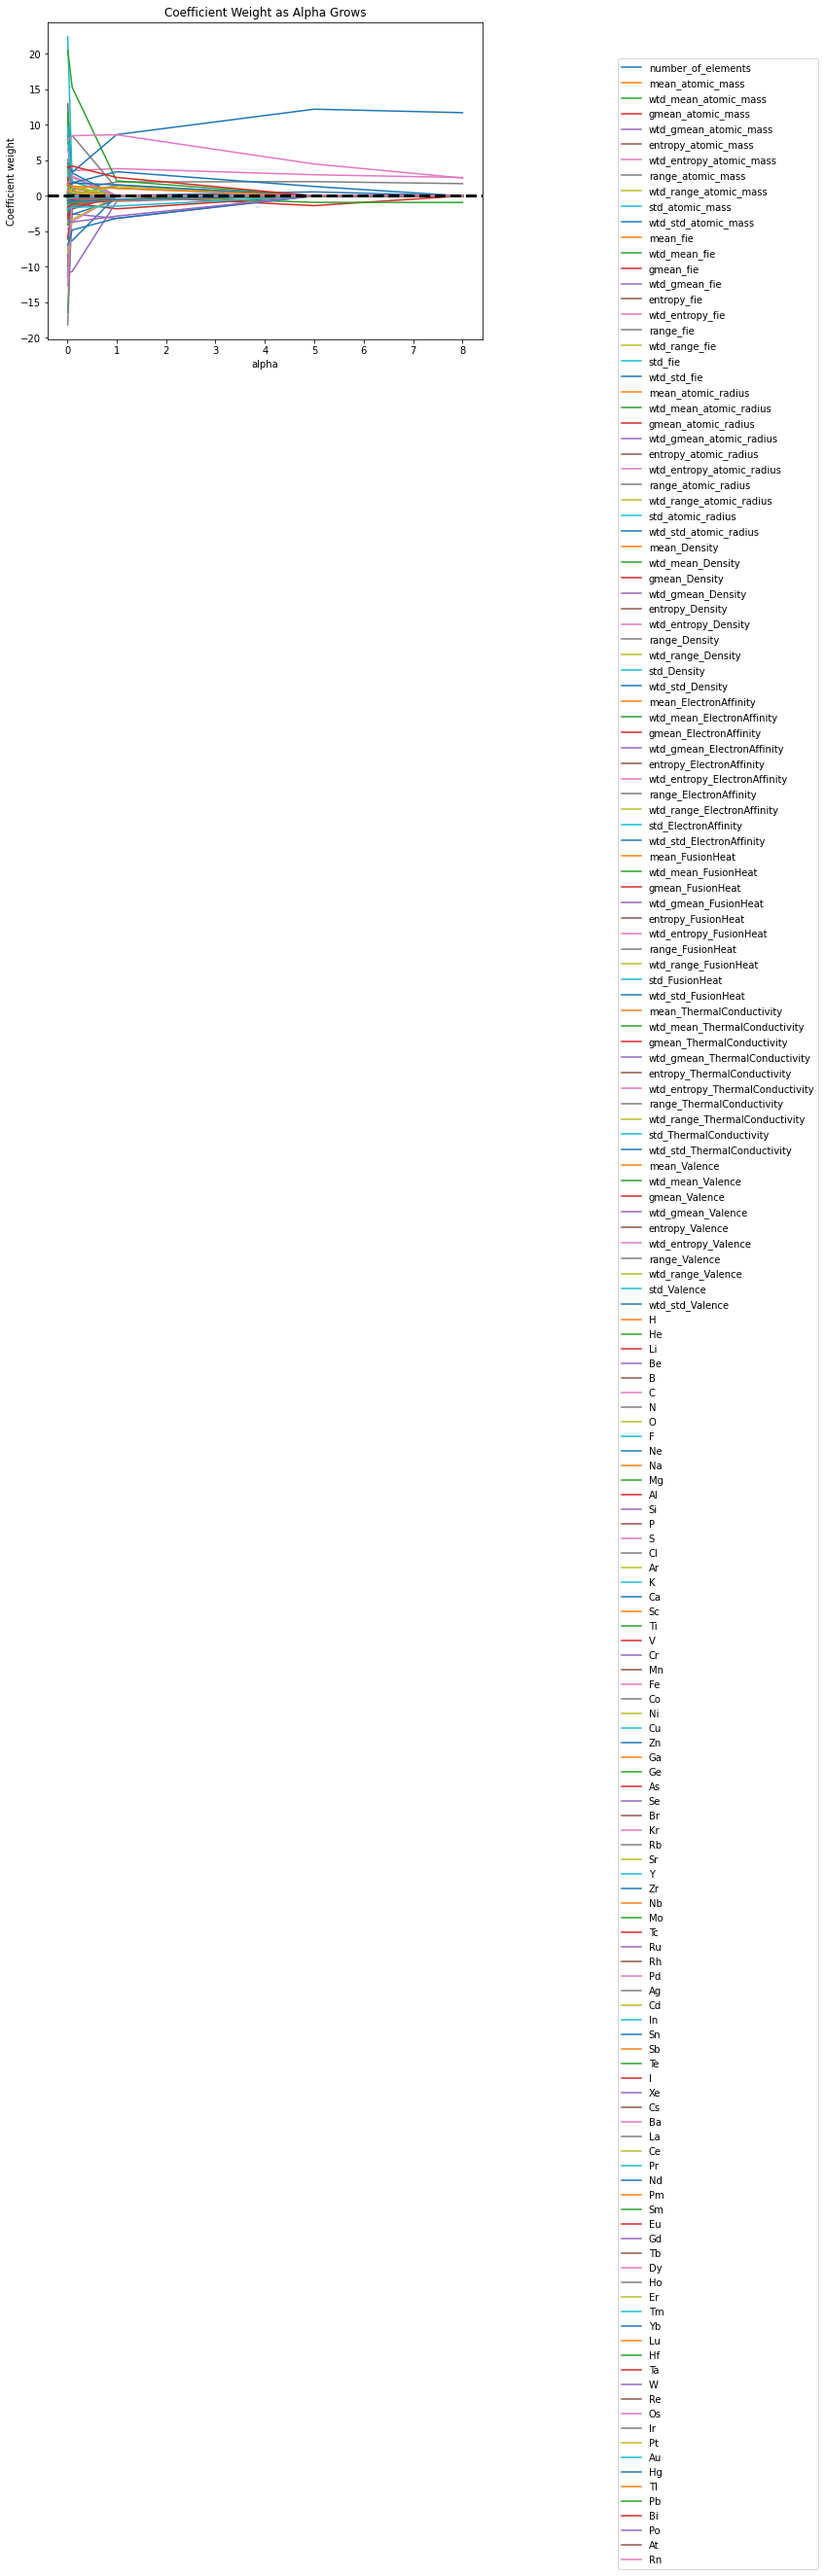

In [26]:
# does the same thing above except for lasso
alphas = [0.01, 0.1, 1, 5, 8]
print('different alpha values:', alphas)

lasso_weight = []
for alpha in alphas:    
    lasso = Lasso(alpha = alpha, fit_intercept = True)
    lasso.fit(X_train_std, y_train)
    lasso_weight.append(lasso.coef_)

lasso_fig = weight_versus_alpha_plot(lasso_weight, alphas, features)

In [42]:
# n_alphas: number of alpha values (automatically chosen) to try
# select the best alpha with LassoCV
lasso_cv = LassoCV(n_alphas = 10, fit_intercept = True)
lasso_cv.fit(X_train_std, y_train)


# examine the coefficients and the errors of the predictions 
# using the best alpha value
y_pred = lasso_cv.predict(X_test_std)
print('coefficients:\n', lasso_cv.coef_)
print('best alpha:\n', lasso_cv.alpha_)
print('\nRSS:', np.sum(( y_test - y_pred ) ** 2))



/Users/arth/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62602.301642360166, tolerance: 1500.5869506178701
  model = cd_fast.enet_coordinate_descent_gram(
/Users/arth/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72043.30302840378, tolerance: 1502.2698699198647
  model = cd_fast.enet_coordinate_descent_gram(
/Users/arth/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70047.90181108378, tolerance: 1494.1573220901416
  model = cd_fast.enet_coordinate_descent_gram(
/Users/arth/opt/anaconda3/lib/python3.8/site-packages/skl

coefficients:
 [ 8.19850490e-01  3.29058574e+00 -4.87094696e+00  0.00000000e+00
 -0.00000000e+00 -2.00482909e+00  4.19783383e+00  8.57308828e+00
 -0.00000000e+00  0.00000000e+00 -6.82342345e+00  0.00000000e+00
  0.00000000e+00  7.27614345e-01  1.11605477e+00  0.00000000e+00
  3.21666915e-01  2.05665339e+00  0.00000000e+00 -3.45353201e+00
 -0.00000000e+00 -0.00000000e+00  1.96790338e+00 -1.73719532e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  2.07041146e+00
 -1.24776147e+00 -3.05288110e+00  5.96184283e+00 -2.77271767e+00
  3.87973630e+00 -2.18481293e+00  0.00000000e+00 -2.70830851e+00
 -1.17722928e+00 -1.28641930e+00  5.88330980e-01  0.00000000e+00
 -6.53918143e-01  8.53263962e-01  0.00000000e+00  1.14681709e+00
 -3.86213952e+00  0.00000000e+00 -3.46230278e+00 -7.75311013e+00
 -7.54058492e-01  1.04214838e+01 -3.05398740e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  3.71710431e+00 -4.09222840e-01  1.81066059e+00 -0.00000000e+00
 -2.393026

In [40]:
y_pred = lasso_cv.predict(X_train)
print(mean_absolute_error(y_train,y_pred))


12623.823445225056


#### L2-Ridge Model

In [28]:
# loop through different penalty score (alpha) and obtain the estimated coefficient (weights)
alphas = 10 ** np.arange(1, 5)
print('different alpha values:', alphas)

# stores the weights of each feature
ridge_weight = []
for alpha in alphas:    
    ridge = Ridge(alpha = alpha, fit_intercept = True)
    ridge.fit(X_train_std, y_train)
    ridge_weight.append(ridge.coef_)

different alpha values: [   10   100  1000 10000]


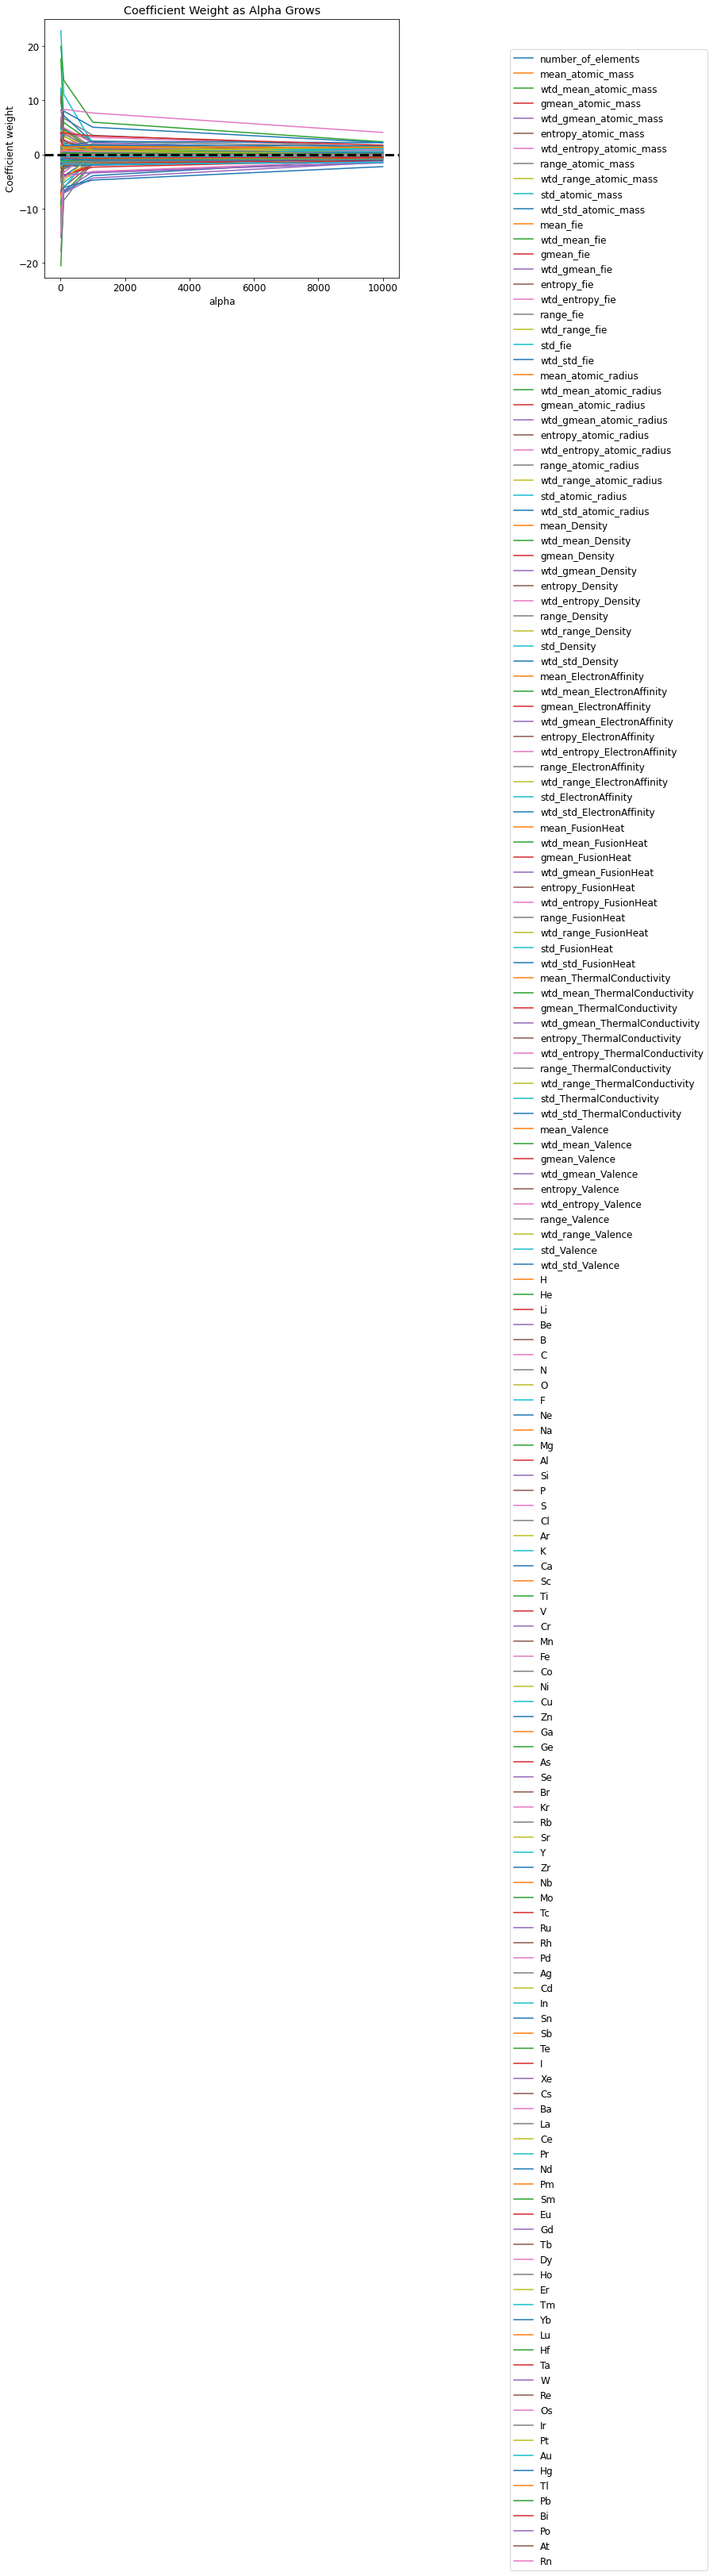

In [29]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12


ridge_fig = weight_versus_alpha_plot(ridge_weight, alphas, features)


In [30]:
# alpha: array of alpha values to try; must be positive, increase for more regularization
# create an array of alpha values and select the best one with RidgeCV
alpha_range = 10. ** np.arange(-2, 3)
ridge_cv = RidgeCV(alphas = alpha_range, fit_intercept = True)
ridge_cv.fit(X_train_std, y_train)

# examine the coefficients and the errors of the predictions 
# using the best alpha value
y_pred = ridge_cv.predict(X_test_std)


print('coefficients:\n', ridge_cv.coef_)
print('best alpha:\n' , ridge_cv.alpha_)
print('\nRSS:', np.sum((y_test - y_pred) ** 2))



coefficients:
 [ 1.19326769e+00  4.28518037e+00 -7.04259864e+00  2.70909686e+00
 -1.46259678e+00 -5.97008428e+00  3.57968283e+00  6.69167150e+00
  5.00832634e-01  6.37851805e-01 -6.86624827e+00 -1.43017458e+00
  1.17262979e+00  1.51437575e+00  1.49615677e+00  1.92606685e+00
  3.89279140e+00  4.82540465e+00  1.43236360e+00 -5.15344268e+00
 -1.95863056e+00 -2.62951574e-01  5.90825312e+00 -2.59942152e+00
 -1.98342555e+00 -7.95780161e-02  1.25137334e+00  4.46387959e+00
 -2.09338029e+00 -6.08228792e+00  7.19205964e+00 -4.07318303e+00
  4.72192544e+00 -3.96748852e+00  1.55668594e+00 -2.41354201e+00
 -2.20470300e+00 -2.69386956e+00  3.73863033e-01  1.98496085e+00
 -1.45939844e+00  9.77446615e-01  3.44003234e+00  1.20373183e+00
 -6.60761063e+00  5.34202732e-01 -4.18080086e+00 -8.45919727e+00
 -2.03866189e+00  1.10708971e+01 -3.97181321e+00  7.37658148e-01
 -1.64646644e+00  2.55642616e-01 -3.07557683e-01 -1.62436264e+00
  4.96198297e+00 -1.56277638e+00  3.30594009e+00  1.26591488e-01
 -2.153307

In [41]:
y_pred = ridge_cv.predict(X_train)
print(mean_absolute_error(y_train,y_pred))


24076.76407803163


In [48]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline
lasso_pipe_svc = make_pipeline(RobustScaler(), Lasso(random_state=1))
ridge_pipe_svc = make_pipeline(RobustScaler(), Ridge(random_state=1))

param_range = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 100, 1000, 10000]
param_l1_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

param_grid_lasso = [{'lasso__alpha': param_range}]
param_grid_ridge = [{'ridge__alpha': param_range}]

gs_lasso = GridSearchCV(estimator=lasso_pipe_svc, param_grid=param_grid_lasso, scoring='r2', cv=5, n_jobs=-1)
gs_lasso.fit(X_train, y_train)

gs_ridge = GridSearchCV(estimator=ridge_pipe_svc, param_grid=param_grid_ridge, scoring='r2', cv=5, n_jobs=-1)
gs_ridge.fit(X_train, y_train)




Lasso
0.7379441963982758
{'lasso__alpha': 0.1}

Ridge
0.7381836497384814
{'ridge__alpha': 100}

Regular
<bound method RegressorMixin.score of LinearRegression(normalize=True)>


In [49]:
print("Lasso")
print(gs_lasso.best_score_)
print(gs_lasso.best_params_)
print("")

print("Ridge")
print(gs_ridge.best_score_)
print(gs_ridge.best_params_)
print("")

print("Regular")
print(reg.score(X_train, y_train))


Lasso
0.7379441963982758
{'lasso__alpha': 0.1}

Ridge
0.7381836497384814
{'ridge__alpha': 100}

Regular
0.7683816092272885


In [55]:
from sklearn import metrics

# Note the X_test gets run through the pipeline above! Very important, it means that the scaler is also run on the test data
y_lasso_pred = gs_lasso.predict(X_test)
y_ridge_pred = gs_ridge.predict(X_test)
y_pred = reg.predict(X_train)

print("Lasso")
print("R2 ->", metrics.r2_score(y_test, y_lasso_pred))
print("MAE ->", metrics.mean_absolute_error(y_test, y_lasso_pred))

print("Ridge")
print("R2 ->", metrics.r2_score(y_test, y_ridge_pred))
print("MAE ->", metrics.mean_absolute_error(y_test, y_ridge_pred))
print("")





Lasso
R2 -> 0.5670044899346585
MAE -> 13.337904510832372
Ridge
R2 -> 0.4425319380341406
MAE -> 12.995829837668456

